# Fraudulent Firm Classification: A Case Study of an External Audit

#### Data Set Information:
This dataset is taken from a research explained here.

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe.

_** The main objective of this project is to perform the audit risk analysis using 776 target firm's historical data. Our main foucs is on determining the Rish Audit Score. We used several supervised techniques (Regression) to determine the Risk Audit Score  which will be discussed below.** _

_** We followed a sequence of steps starting with with importing required libraries, data merging, data pre-processing, data vizualization, etc. So let's get started **_

<font color='green'>
Note: Bagging, Pasting, Adaboosting is performed on all the models for both regression and classification to check whether bagging/pasting/Adaboosting improves scores
</font>

### Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing Datasets

In [12]:
audit = pd.read_csv('audit_risk.csv')
trial = pd.read_csv('trial.csv')

In [23]:
print(audit.shape)
print(trial.shape)

(776, 27)
(776, 18)


### Data Distribution

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
Risk,,,,,,,,,,,,,,,,,,,,,
0,471,471,471,471,471,471,471,471,471,471,...,471,471,471,471,471,471,471,471,471,471
1,305,305,305,305,305,305,305,305,305,305,...,305,305,305,305,305,305,305,305,305,305


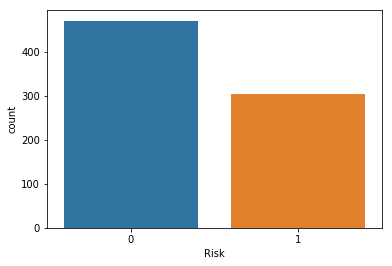

In [4]:
sns.countplot(audit['Risk'])
audit.groupby('Risk').count()

### Audit vs Risk

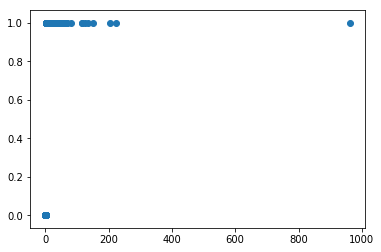

In [5]:
plt.scatter(audit['Audit_Risk'],audit['Risk'])

## We can see an outlier that screws can screw out analysis. We will handle this outlier in data pre-processing.

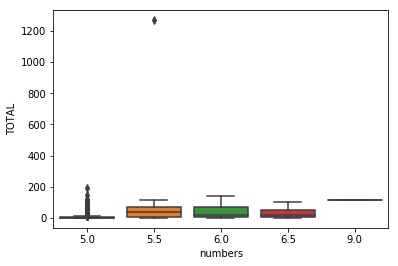

In [6]:
sns.boxplot(audit['numbers'],audit['TOTAL'])

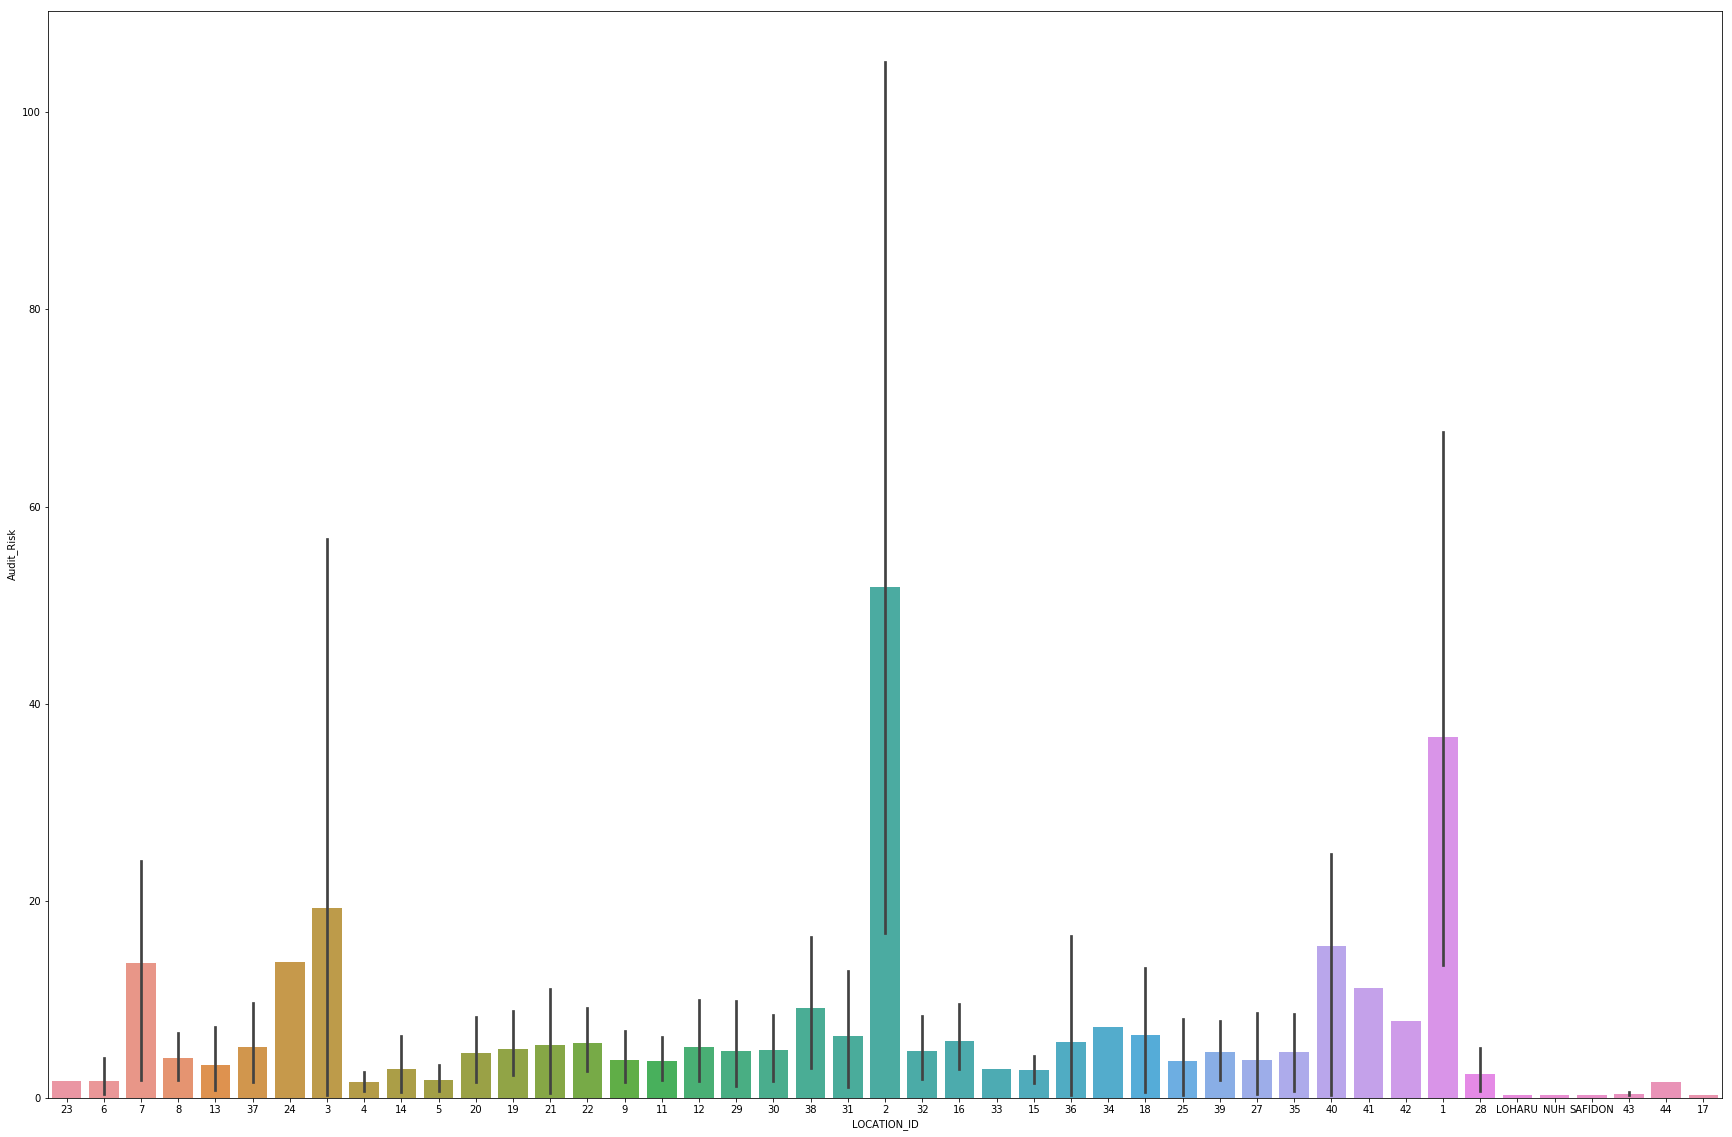

In [7]:
plt.figure(figsize=(30,20))
sns.barplot(x='LOCATION_ID',y='Audit_Risk',data= audit,estimator=np.mean)

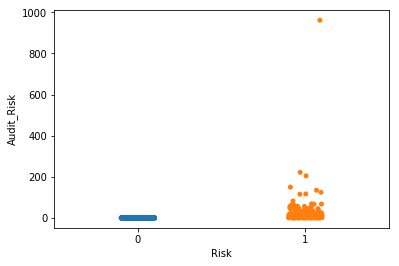

In [5]:
#loooking for outliers in the audit's risk colum
sns.stripplot(x='Risk',y='Audit_Risk',data=audit)

### Data Pre-processing
1. Checking for duplicates
2. Imputing Missing values
3. Merging Data

_**1.) Check and Remove duplicate rows from data **_ 

In [13]:
audit = audit[audit.duplicated() == False]
audit.shape

(763, 27)

In [14]:
#Check and Remove duplicate rows from data
trial = trial[trial.duplicated()  == False]
trial.shape

(763, 18)

_**2.) Imputing missing values **_ 

In [6]:
audit[audit['Money_Value'].isnull()]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
642,55.57,4,0.23,0.2,0.046,0.0,0.2,0.0,0.23,5.0,...,0.4,0,0.2,0.0,2.0,1.446,0.4,0.5,0.2892,0


In [7]:
trial[trial['Money_Value'].isnull()]

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
642,55.57,4,0.23,2,0.0,2,0.23,5.0,2,NaN,2,2,0,2,0,2,2.0,0


Both audit & trail have one missing value. Since dataset is small its better to impute the missing value rather than removing missing values. So let's impute the missing Money_Value with it's median grouped by 'Sector_Score' column

In [8]:
audit[['Sector_score','Money_Value']].groupby('Sector_score').median()

,Money_Value
Sector_score,
1.85,0.020
1.99,0.050
2.34,0.000
2.36,88.400
2.37,0.575
2.72,8.440
3.41,10.215
3.89,2.565
15.56,160.410


Sector_Score - Is the score of each firm mentioned above in Data Description

Missing value is in 'Money_Value' that falls under Sector_Score = 55.57.

Impute the missing value with median of Money_Value under Sector_score = 55.57

In [15]:
audit['Money_Value'].fillna(0,inplace=True)
trial['Money_Value'].fillna(0,inplace=True)

_** 3. Merging Datasets **_

Both dataframes (audit, trial) have similar columns that hold similar value

Use join command to join on multiple columns

In [16]:
#Renaming Risk column of trial data as  Trial_Risk
trial.rename(columns = {'Risk': 'Trial_Risk'},inplace = True)

In [17]:
data = audit.join(trial.set_index(['Sector_score', 'LOCATION_ID', 'PARA_A','PARA_B','TOTAL', 'numbers', 'Money_Value',
       'History', 'Score']), on= ['Sector_score', 'LOCATION_ID',  'PARA_A','PARA_B', 'TOTAL', 'numbers', 'Money_Value',
       'History', 'Score']) 

In [17]:
data.shape

(763, 36)

In [18]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'SCORE_A', 'SCORE_B', 'Marks',
       'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History_score',
       'Trial_Risk'],
      dtype='object')

#### Columns like like Distric, Detecttion_risk, Score_A, Score_B are removed since in the merged dataset we can find the transformed values of these columns and indeed no point in considering for analysis 

In [18]:
data = data.drop(['SCORE_A','SCORE_B','District'] , axis=1)

In [19]:
#Dropping Detection_risk
data= data.drop(['Detection_Risk'],axis=1)

In [14]:
data['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [20]:
#Deleting the anomalies of LOCATION_ID., to make the data homogenoeus 
data.drop(data[data['LOCATION_ID'] == 'NUH'].index,inplace=True)
data.drop(data[data['LOCATION_ID'] == 'SAFIDON'].index,inplace=True)
data.drop(data[data['LOCATION_ID'] == 'LOHARU'].index,inplace=True)

### Feature Selection

In [20]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Score_B', 'TOTAL',
       'numbers', 'Money_Value', 'Score_MV', 'District_Loss', 'History',
       'Prob', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk', 'Risk',
       'Marks', 'LOSS_SCORE', 'Trial_Risk'],
      dtype='object')

([<matplotlib.axis.YTick at 0x20005753128>,
 <a list of 31 Text yticklabel objects>)

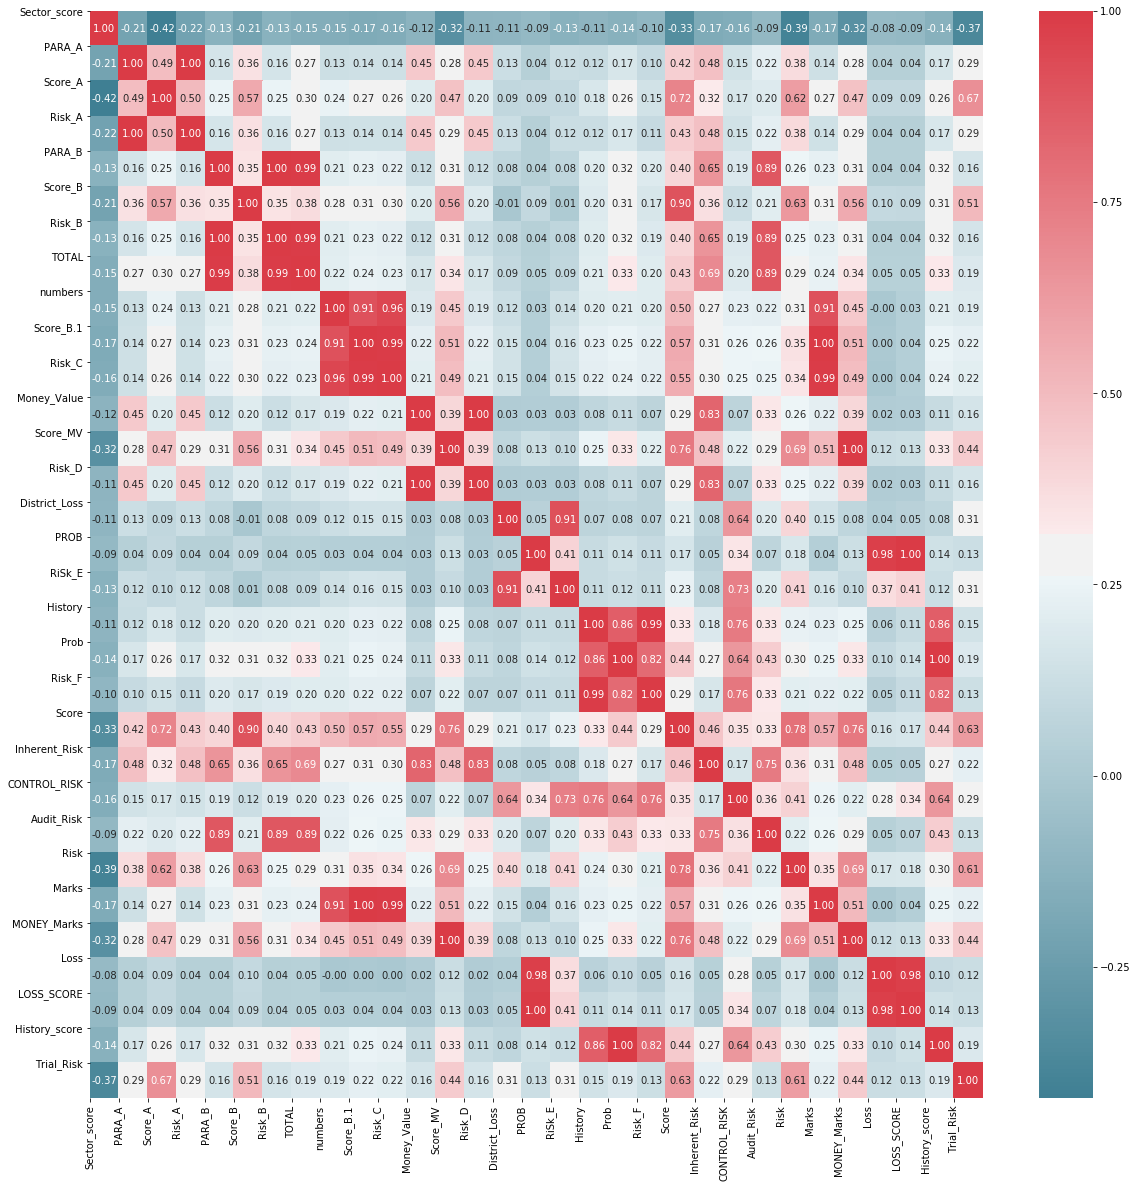

In [25]:
fig, ax = plt.subplots(figsize=(20, 20))
corr = data.corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

#Highly correlated variables deflects model's accuracy. So it's better to remove variables that are highly correlated. Choosing correlation = 0.7 as threshold and removing variables that have correlation greater than 0.7

#Below are the columns that that are considered for analysis which are less correlated

#Removing Risk column, because Risk column is formed based on Audit Risk Score. Risk is dependent om Audit Risk score.

In [21]:
#Removing exact collinarity from data

data=data.drop(['Risk_A','Risk_B','Risk_C','Risk_D','RiSk_E','Risk_F','Loss','History_score','MONEY_Marks','Score_B.1','PROB','PARA_B'],axis=1)

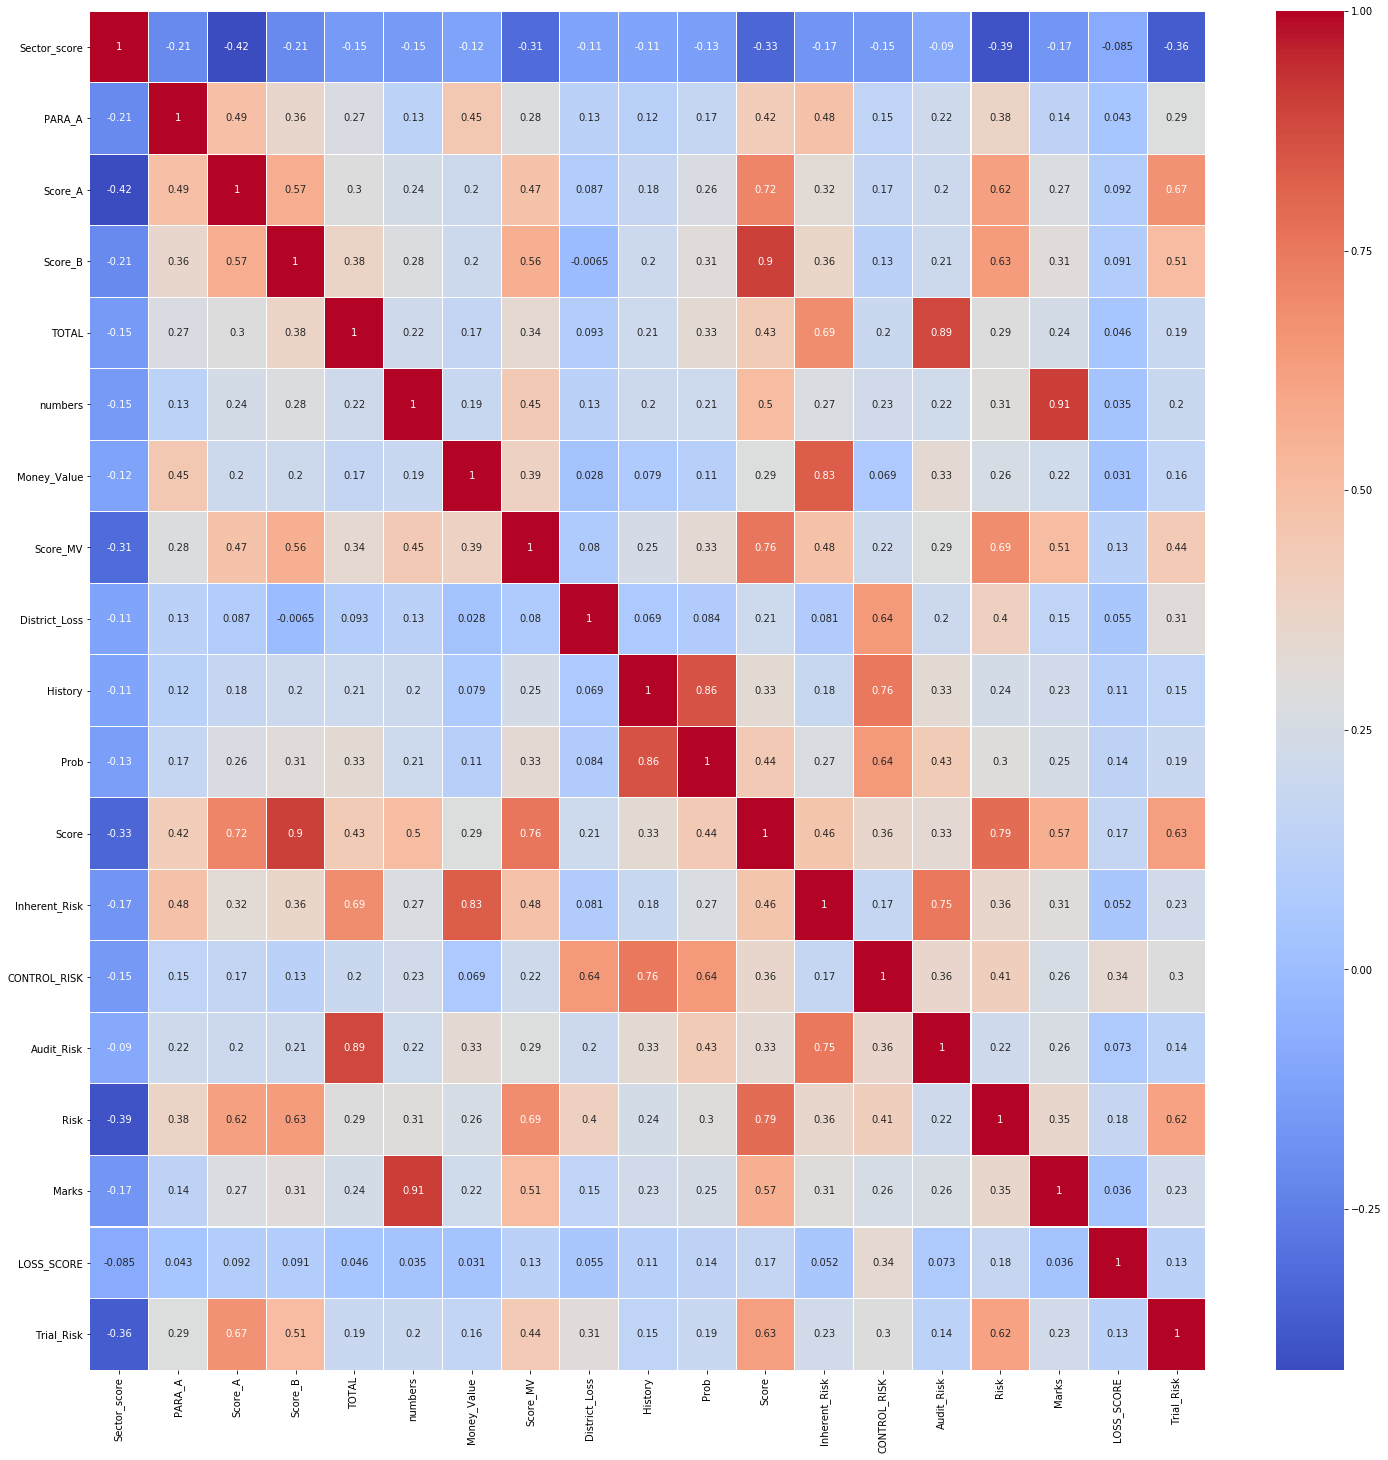

In [18]:
#Checking Correlation after removing exact collinearity

dc = data.corr()
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(dc,annot=True,cmap='coolwarm',linewidths=0.1, ax=ax)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 775
Data columns (total 20 columns):
Sector_score     760 non-null float64
LOCATION_ID      760 non-null object
PARA_A           760 non-null float64
Score_A          760 non-null float64
Score_B          760 non-null float64
TOTAL            760 non-null float64
numbers          760 non-null float64
Money_Value      760 non-null float64
Score_MV         760 non-null float64
District_Loss    760 non-null int64
History          760 non-null int64
Prob             760 non-null float64
Score            760 non-null float64
Inherent_Risk    760 non-null float64
CONTROL_RISK     760 non-null float64
Audit_Risk       760 non-null float64
Risk             760 non-null int64
Marks            760 non-null int64
LOSS_SCORE       760 non-null int64
Trial_Risk       760 non-null int64
dtypes: float64(13), int64(6), object(1)
memory usage: 144.7+ KB


In [22]:
#Changing data type of LOCATION_ID from object to float
data['LOCATION_ID']=data['LOCATION_ID'].astype(float)

In [23]:
#Removing outliers with 3sigma rule
import scipy.stats as stats
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data.shape

(701, 20)

In [24]:
#Transforming District_Loss as dummy column

cols = pd.get_dummies(data['District_Loss'],drop_first = "True")
data[cols.columns] = cols
data.drop(['District_Loss'], axis = 1, inplace=True)
data.rename(columns = {4: 'District_4',6:'District_6' },inplace = True)

### Data Scaling
Since the variables we considered for analysis are not in same range we need to scale them before analysis.

In [25]:
X = data.drop(['Audit_Risk','Risk','Trial_Risk','LOCATION_ID','PARA_A','TOTAL','Money_Value'],axis = 1 )
y = data['Audit_Risk']

from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [46]:
X.columns

Index(['Sector_score', 'Score_A', 'Score_B', 'numbers', 'Score_MV', 'History',
       'Prob', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Marks', 'LOSS_SCORE',
       'District_4', 'District_6'],
      dtype='object')

### Supervised Learning - Regression
1. Linear Regression
2. KNN Regressor
3. Ridge Regression
4. Lasso Regression
5. Polynomial Regression
6. SVR (kernal = linear, rbf,poly)
7. LinearSVR
8. PCA
9. Deep Learning

#### 1.Linear Regression

In [43]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Train:%.4f"%lr.score(X_train,y_train))
print("Test:%.4f"%lr.score(X_test,y_test))

Train:0.8897
Test:0.8780


In [44]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
bag_lr = BaggingRegressor(lr,n_estimators=500,max_samples=100,random_state=0)
bag_lr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_lr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_lr.score(X_test, y_test)))

Train score: 0.8886
Test score: 0.8870


In [45]:
#PAsting
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
bag_lr = BaggingRegressor(lr,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_lr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_lr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_lr.score(X_test, y_test)))

Train score: 0.8884
Test score: 0.8940


In [46]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
ada_lr = AdaBoostRegressor(lr,n_estimators=200,learning_rate=0.01)
ada_lr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_lr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_lr.score(X_test, y_test)))

Train score: 0.8800
Test score: 0.8219


### KNN Regressor

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
knn = KNeighborsRegressor()
#Most efficient parameter using GridSearch()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10)
grid.fit(X_train,y_train)
grid.best_score_
grid.best_estimator_

print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))



C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Tanmay\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.79


In [48]:
k = KNeighborsRegressor(n_neighbors=3)
k.fit(X_train,y_train)
print('Train score: {:.4f}'.format(k.score(X_train,y_train)))
print('Test score: {:.4f}'.format(k.score(X_test,y_test)))

Train score: 0.9407
Test score: 0.8975


In [49]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
k = KNeighborsRegressor(n_neighbors=3)
bag_reg = BaggingRegressor(k,n_estimators=500,max_samples=100,bootstrap=True,random_state=0)
bag_reg.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.7438
Test score: 0.8379


In [50]:
#Pasting
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
k = KNeighborsRegressor(n_neighbors=3)
bag_knn_reg = BaggingRegressor(k,n_estimators=500,max_samples=100,bootstrap=False,random_state=0)
bag_knn_reg.fit(X_train,y_train)
print('Train score: {:.2f}'.format(bag_knn_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_knn_reg.score(X_test, y_test)))

Train score: 0.74
Test score: 0.84


In [51]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
k = KNeighborsRegressor(n_neighbors=3)

ada_knn = AdaBoostRegressor(k,n_estimators=200,learning_rate=0.01)
ada_knn.fit(X_train,y_train)
print('Train score: {:.2f}'.format(ada_knn.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_knn.score(X_test, y_test)))

Train score: 1.00
Test score: 0.85


### Ridge Regression

Text(0.5, 0, '$\\alpha$')

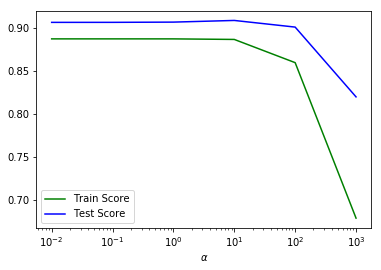

In [52]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [53]:
# GridSearch()
from sklearn.model_selection import GridSearchCV
alphas = np.array([1000,100,10,1,0.1,0.01,0.001])
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train,y_train)

print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))


Best parameters: {'alpha': 1.0}
Best cross-validation score: 0.87


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [54]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.8868
Test score: 0.9059


In [55]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1)
bag_ridge = BaggingRegressor(ridge,n_estimators=500,max_samples=100,random_state=0)
bag_ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_ridge.score(X_test, y_test)))

Train score: 0.8858
Test score: 0.9130


In [56]:
#Pasting
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1)
bag_ridge = BaggingRegressor(ridge,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_ridge.score(X_test, y_test)))

Train score: 0.8852
Test score: 0.9138


In [57]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1)
ada_ridge = AdaBoostRegressor(ridge,n_estimators=200,learning_rate=0.01)
ada_ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ada_ridge.score(X_test, y_test)))

Train score: 0.8751
Test score: 0.8512


### Lasso Regression

Text(0.5, 0, '$\\alpha$')

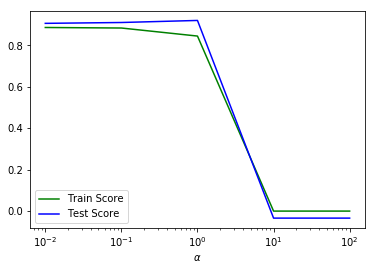

In [58]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [59]:
#Grid_Search
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Lasso(),param_grid,cv=5,return_train_score=True)
grid_search.fit(X_train,y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.87


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

In [60]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.8842
Test score: 0.9109


In [61]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
bag_lasso = BaggingRegressor(lasso,n_estimators=500,max_samples=100,random_state=0)
bag_lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_lasso.score(X_test, y_test)))

Train score: 0.8281
Test score: 0.9127


In [62]:
#Pasting
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
bag_lasso = BaggingRegressor(lasso,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_lasso.score(X_test, y_test)))

Train score: 0.8236
Test score: 0.9096


In [63]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
ada_lasso = AdaBoostRegressor(lasso,n_estimators=200,learning_rate=0.01)
ada_lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ada_lasso.score(X_test, y_test)))

Train score: 0.8775
Test score: 0.8806


### SVM - Simple

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


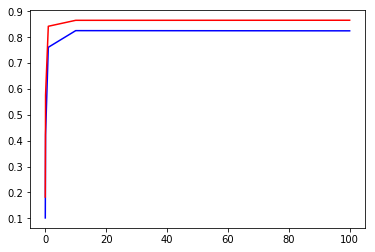

In [43]:
from sklearn.svm import LinearSVR
train_score = []
test_score = []
C = [0.01,0.1,1,10,100]

for i in C:
    svr = LinearSVR(C=i)
    svr.fit(X_train,y_train)
    train_score.append(svr.score(X_train,y_train))
    test_score.append(svr.score(X_test,y_test))

plt.plot(C,train_score,'b')
plt.plot(C,test_score,'r')

In [44]:
# Grid_Search
from sklearn.model_selection import GridSearchCV
param_grid ={'C':[0.001, 0.01, 0.1, 1, 10]} 
grid_search = GridSearchCV(LinearSVR(),param_grid,cv=5,return_train_score=True)

grid_search.fit(X_train,y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'C': 10}
Best cross-validation score: 0.82


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [45]:
svr = LinearSVR(C=10)
svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svr.score(X_test, y_test)))

Train score: 0.7612
Test score: 0.8426


In [46]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
svr = LinearSVR(C=10)
bag_svr = BaggingRegressor(svr,n_estimators=500,max_samples=100,random_state=0)
bag_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_svr.score(X_test, y_test)))

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train score: 0.7612
Test score: 0.8426


In [47]:
#Pasting
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
svr = LinearSVR(C=10)
bag_svr = BaggingRegressor(svr,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_svr.score(X_test, y_test)))

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train score: 0.7612
Test score: 0.8426


In [69]:
#AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
svr = LinearSVR(C=10)
ada_svr = AdaBoostRegressor(svr,n_estimators=200,learning_rate=0.01)
ada_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ada_svr.score(X_test, y_test)))

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Train score: 0.8942
Test score: 0.9012


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### SVM (Kernal = RBF)

In [33]:
# SVM(Kernel = RBF)

from sklearn.svm import SVR
from sklearn import metrics
param_grid = { "C":[0.0001,0.001,0.01,1,10],
             "gamma":[0.0001,0.001,0.01,1,10]
             }
svr_rbf = GridSearchCV(SVR(kernel='rbf'),param_grid,cv=5)

svr_rbf.fit(X_train,y_train)

print("Best parameters: {}".format(svr_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(svr_rbf.best_score_))
print('Train score: {:.4f}'.format(svr_rbf.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svr_rbf.score(X_test, y_test)))
pred = svr_rbf.predict(X_test)
print("Mean Squared Error Test:", metrics.mean_squared_error(y_test,pred))

Best parameters: {'C': 10, 'gamma': 1}
Best cross-validation score: 0.76
Train score: 0.8797
Test score: 0.8761
Mean Squared Error Test: 3.4955687291052655


In [49]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf',C=10,gamma=1)
bag_svr = BaggingRegressor(svr_rbf,n_estimators=500,max_samples=100,random_state=0)
bag_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_svr.score(X_test, y_test)))

Train score: 0.2823
Test score: 0.4179


In [50]:
#Pasting
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf',C=10,gamma=1)
bag_svr = BaggingRegressor(svr_rbf,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_svr.score(X_test, y_test)))

Train score: 0.2781
Test score: 0.4124


In [51]:
#Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf',C=10,gamma=1)
ada_svr = AdaBoostRegressor(svr_rbf,n_estimators=200,learning_rate=0.01)
ada_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ada_svr.score(X_test, y_test)))

Train score: 0.6977
Test score: 0.7249


### SVm (kernal = Poly)

In [ ]:
# SVM(Kernel = Poly)
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = { "C":[0.0001,0.001,0.01,1,10],
             "gamma":[0.0001,0.001,0.01,1,10]
             }
svr_poly = GridSearchCV(SVR(kernel='poly'),param_grid,cv=5)

svr_poly.fit(X_train,y_train)

print("Best parameters: {}".format(svr_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(svr_poly.best_score_))
print('Train score: {:.4f}'.format(svr_poly.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svr_poly.score(X_test, y_test)))
pred = svr_poly.predict(X_test)
print("Mean Squared Error Test:", metrics.mean_squared_error(y_test,pred))

Best Parameters: C = 0.001, gamma =1

Train score: 0.9934

Test score: 0.9968

In [68]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly',C=0.001,gamma=1)
bag_svr = BaggingRegressor(svr_poly,n_estimators=500,max_samples=100,random_state=0)
bag_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_svr.score(X_test, y_test)))

Train score: 0.9026
Test score: 0.9481


In [69]:
#Pasting
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly',C=0.001,gamma=1)
bag_svr = BaggingRegressor(svr_poly,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_svr.score(X_test, y_test)))

Train score: 0.9067
Test score: 0.9480


### SVM (Kernal = Linear)

In [34]:
#SVM(Kernel = Linear
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
param_grid = { "C":[0.0001,0.001,0.01,1,10],
             "gamma":[0.0001,0.001,0.01,1,10]
             }
svr_linear = GridSearchCV(SVR(kernel='linear'),param_grid,cv=5)

svr_linear.fit(X_train,y_train)

print("Best parameters: {}".format(svr_linear.best_params_))
print("Best cross-validation score: {:.2f}".format(svr_linear.best_score_))
print('Train score: {:.4f}'.format(svr_linear.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svr_linear.score(X_test, y_test)))
pred = svr_linear.predict(X_test)
print("Mean Squared Error Test:", metrics.mean_squared_error(y_test,pred))

Best parameters: {'C': 10, 'gamma': 0.0001}
Best cross-validation score: 0.82
Train score: 0.8281
Test score: 0.8682
Mean Squared Error Test: 3.7170444246433845


In [35]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',C=1,gamma=0.0001)
bag_svr = BaggingRegressor(svr_linear,n_estimators=500,max_samples=100,random_state=0)
bag_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_svr.score(X_test, y_test)))

Train score: 0.5185
Test score: 0.6584


In [36]:
#Pasting
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',C=1,gamma=0.0001)
bag_svr = BaggingRegressor(svr_linear,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(bag_svr.score(X_test, y_test)))

Train score: 0.5175
Test score: 0.6606


In [37]:
#Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',C=1,gamma=0.0001)
ada_svr = AdaBoostRegressor(svr_linear,n_estimators=200,learning_rate=0.01)
ada_svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ada_svr.score(X_test, y_test)))

Train score: 0.8439
Test score: 0.8485


### Polynomial Regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
poly = PolynomialFeatures(4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr.fit(X_train_poly, y_train)
print('Train score: {:.4f}'.format(lr.score(X_train_poly,y_train)))
print('Test score: {:.4f}'.format(lr.score(X_test_poly, y_test)))

Train score: 1.0000
Test score: 0.9968


In [39]:
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1)
grad.fit(X_train_poly,y_train)
print('Train score: {:.4f}'.format(grad.score(X_train_poly,y_train)))
print('Test score: {:.4f}'.format(grad.score(X_test_poly, y_test)))

Train score: 0.9999
Test score: 0.9879


### Overview of Regression scores

In [32]:
Regression = {'Model':['Linear Regression','KNN Regressor','Ridge Regression','Lasso Regression','SVR_linear','SVR_rbf','SVR_poly','Linear SVR','Polynomial Regression'],
             'Train Score':[0.88,0.94,0.88,0.88,0.7612,0.8797,0.9934,0.8281,1],
              'Test Score':[0.87,0.89,0.90,0.91,0.8246,0.8761,0.9868,0.8682,0.9968]}
Regression_score = pd.DataFrame(Regression)
Regression_score


,Model,Test Score,Train Score
0,Linear Regression,0.8700,0.8800
1,KNN Regressor,0.8900,0.9400
2,Ridge Regression,0.9000,0.8800
3,Lasso Regression,0.9100,0.8800
4,SVR_linear,0.8246,0.7612
5,SVR_rbf,0.8761,0.8797
6,SVR_poly,0.9868,0.9934
7,Linear SVR,0.8682,0.8281
8,Polynomial Regression,0.9968,1.0000


## PCA

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95,random_state = 0)

#train pca model
pca.fit(X)

#transforming X_train and X_test
#X_train_reduced = pca.transform(X_train)
#X_test_reduced = pca.transform(X_test)

X_red = pca.transform(X)

In [26]:
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_red,y, random_state = 0)

In [44]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr_pca = LinearRegression()
lr_pca.fit(X_train_reduced,y_train)
print("PCA Score:%.4f"%lr_pca.score(X_train_reduced,y_train))
print("PCA Score:%.4f"%lr_pca.score(X_test_reduced,y_test))

PCA Score:0.7878
PCA Score:0.8279


In [45]:
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
k_pca = KNeighborsRegressor(n_neighbors=3)
k_pca.fit(X_train_reduced,y_train)
print("PCA Score:%.4f"%k_pca.score(X_train_reduced,y_train))
print("PCA Score:%.4f"%k_pca.score(X_test_reduced,y_test))

PCA Score:0.9036
PCA Score:0.4603


In [46]:
#Ridge
from sklearn.linear_model import Ridge
ridge_pca = Ridge(alpha = 1)
ridge_pca.fit(X_train_reduced,y_train)
print("PCA Score:%.4f"%ridge_pca.score(X_train_reduced,y_train))
print("PCA Score:%.4f"%ridge_pca.score(X_test_reduced,y_test))

PCA Score:0.7878
PCA Score:0.8280


In [47]:
#Lasso
from sklearn.linear_model import Lasso
lasso_pca = Lasso(alpha=0.01)
lasso_pca.fit(X_train_reduced,y_train)
print("PCA Score:%.4f"%lasso_pca.score(X_train_reduced,y_train))
print("PCA Score:%.4f"%lasso_pca.score(X_test_reduced,y_test))

PCA Score:0.7877
PCA Score:0.8308


In [49]:
#Linear SVR
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
svr_pca = LinearSVR(C=10)
svr_pca.fit(X_train_reduced,y_train)
print("PCA Score:%.4f"%svr_pca.score(X_train_reduced,y_train))
print("PCA Score:%.4f"%svr_pca.score(X_test_reduced,y_test))

PCA Score:0.7424
PCA Score:0.7415


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
from sklearn.svm import SVR

train = []
test = []
index = []

for C in [0.001, 0.01,0.1, 1, 10, 100]:
    for gamma in [0.001, 0.01,0.1, 1, 10, 100]:
        #create the model
        svr = SVR(kernel = 'rbf', C = C, gamma = gamma)
        
        #train the model
        svr.fit(X_train_reduced, y_train)
        
        #evaluate the model
        train.append(svr.score(X_train_reduced, y_train))
        test.append(svr.score(X_test_reduced, y_test))
        index.append((C,gamma))

([<matplotlib.axis.XTick at 0x2000b01bf60>,
 <a list of 36 Text xticklabel objects>)

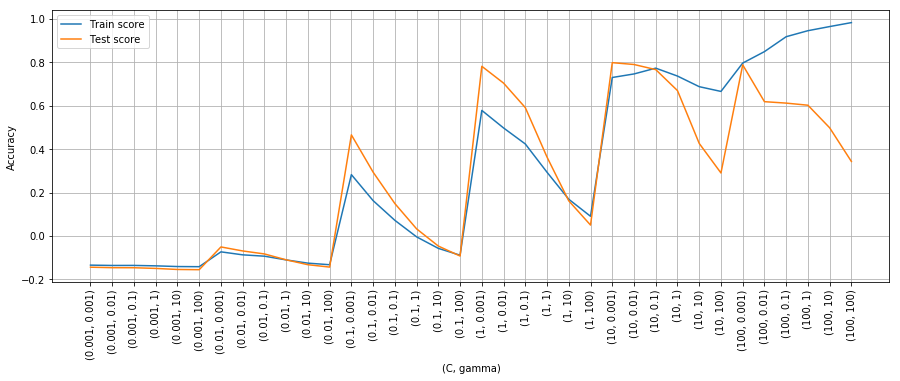

In [51]:
%matplotlib inline

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15,5))

plt.plot(range(len(index)), train, label = 'Train score')
plt.plot(range(len(index)), test, label = 'Test score')
plt.legend()
plt.grid()
plt.xlabel('(C, gamma)')
plt.ylabel('Accuracy')
plt.xticks(range(len(index)), index, rotation = 90)

In [26]:
#SVM_rbf
from sklearn.svm import SVR
svr_rbf_pca = SVR(kernel='rbf',C=10,gamma=0.001)
svr_rbf_pca.fit(X_train_reduced,y_train)
print("PCA Score:%.4f"%svr_rbf_pca.score(X_train_reduced,y_train))
print("PCA Score:%.4f"%svr_rbf_pca.score(X_test_reduced,y_test))

PCA Score:0.7303
PCA Score:0.7987


In [ ]:
#SVM_poly
from sklearn.svm import SVR
svr_poly_pca = SVR(kernel='poly',C=0.001,gamma=1)
svr_poly_pca.fit(X_train_reduced,y_train)
print("PCA Score:%.4f"%svr_poly_pca.score(X_train_reduced,y_train))
print("PCA Score:%.4f"%svr_poly_pca.score(X_test_reduced,y_test))

Train PCA Score:1

Test PCA Score:0.89

In [28]:
#SVM_linear
from sklearn.svm import SVR
svr_linear_pca = SVR(kernel='linear',C=10,gamma=0.0001)
svr_linear_pca.fit(X_train_reduced,y_train)
print("PCA Score:%.4f"%svr_linear_pca.score(X_train_reduced,y_train))
print("PCA Score:%.4f"%svr_linear_pca.score(X_test_reduced,y_test))

PCA Score:0.6852
PCA Score:0.7985


In [35]:
X_train_reduced.shape
X_test_reduced.shape

(176, 2)

In [36]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lr_pca = LinearRegression()
poly_pca = PolynomialFeatures(degree=4)
X_train_poly_pca = poly_pca.fit_transform(X_train_reduced)
X_test_poly_pca = poly_pca.transform(X_test_reduced)
lr_pca.fit(X_train_poly_pca, y_train)
print("PCA Score:%.4f"%lr_pca.score(X_train_poly_pca,y_train))
print("PCA Score:%.4f"%lr_pca.score(X_test_poly_pca,y_test))

PCA Score:0.8148
PCA Score:0.8064


### Overview of Regression scores after PCA


In [28]:
PCA_Regression = {'Model':['Linear Regression','KNN Regressor','Ridge Regression','Lasso Regression','SVR_linear','SVR_rbf','SVR_poly','Linear SVR','Polynomial Regression'],
             'PCA Train Score':[0.78,0.90,0.78,0.78,0.742,0.73,1,0.68,0.81],
              'PCA Test Score':[0.82,0.46,0.82,0.83,0.741,0.79,0.89,0.79,0.80]}
PCA_Regression_score = pd.DataFrame(PCA_Regression)
PCA_Regression_score


,Model,PCA Test Score,PCA Train Score
0,Linear Regression,0.820,0.780
1,KNN Regressor,0.460,0.900
2,Ridge Regression,0.820,0.780
3,Lasso Regression,0.830,0.780
4,SVR_linear,0.741,0.742
5,SVR_rbf,0.790,0.730
6,SVR_poly,0.890,1.000
7,Linear SVR,0.790,0.680
8,Polynomial Regression,0.800,0.810


## DEEP LEARNING

In [40]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [41]:
X_train.shape

(525, 14)

In [47]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(32,input_dim = 14 ,kernel_initializer='normal',activation = 'relu'))
#hidden layers
model1.add(Dense(16,input_dim = 14 ,kernel_initializer='normal',activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'mean_absolute_error' , optimizer = 'adam',metrics = ['mean_absolute_error'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 50, batch_size = 300)
\
#step 4: evaluation

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
525/525 [==============================] - 0s 307us/sample - loss: 3.0260 - mean_absolute_error: 3.0260
Epoch 2/50
525/525 [==============================] - 0s 6us/sample - loss: 3.0246 - mean_absolute_error: 3.0246
Epoch 3/50
525/525 [==============================] - 0s 6us/sample - loss: 3.0232 - mean_absolute_error: 3.0232
Epoch 4/50
525/525 [==============================] - 0s 4us/sample - loss: 3.0219 - mean_absolute_error: 3.0219
Epoch 5/50
525/525 [==============================] - 0s 6us/sample - loss: 3.0207 - mean_absolute_error: 3.0207
Epoch 6/50
525/525 [==============================] - 0s 6us/sample - loss: 3.0195 - mean_absolute_error: 3.0195
Epoch 7/50
525/525 [==============================] - 0s 6us/sample - loss: 3.0181 - mean_absolute_error: 3.0181
Epoch 8/50
525/525 [==============================] - 0s 8us/sample - loss: 3.0167 - mean_absolute_error: 3.0167
Epoch 9/50
525/525 [==========================

In [48]:
print(model1.evaluate(X_train, y_train))
print(model1.evaluate(X_test, y_test))

525/525 [==============================] - 0s 89us/sample - loss: 2.8037 - mean_absolute_error: 2.8037
[2.8036676402319047, 2.8036678]
176/176 [==============================] - 0s 17us/sample - loss: 2.0672 - mean_absolute_error: 2.0672
[2.067205320705067, 2.0672052]


# MLP

In [49]:
#step 1: build model
model2 = Sequential()
#input layer
model2.add(Dense(20, input_dim = 14, activation = 'relu'))
#hidden layers
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
#output layer
model2.add(Dense(1, activation = 'sigmoid'))

#step 2: compile the model
model2.compile(loss= 'mean_squared_error' , optimizer = 'adam',metrics = ['mean_squared_error'] )

#step 3: train the model
model2.fit(X_train, y_train, epochs = 30, batch_size = 150)

#step 4: evaluate

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
525/525 [==============================] - 0s 249us/sample - loss: 64.9767 - mean_squared_error: 64.9767
Epoch 2/30
525/525 [==============================] - 0s 10us/sample - loss: 64.9386 - mean_squared_error: 64.9386
Epoch 3/30
525/525 [==============================] - 0s 9us/sample - loss: 64.9062 - mean_squared_error: 64.9062
Epoch 4/30
525/525 [==============================] - 0s 9us/sample - loss: 64.8752 - mean_squared_error: 64.8752
Epoch 5/30
525/525 [==============================] - 0s 8us/sample - loss: 64.8441 - mean_squared_error: 64.8441
Epoch 6/30
525/525 [==============================] - 0s 9us/sample - loss: 64.8121 - mean_squared_error: 64.8121
Epoch 7/30
525/525 [==============================] - 0s 11us/sample - loss: 64.7745 - mean_squared_error: 64.7745
Epoch 8/30
525/525 [==============================] - 0s 10us/sample - loss: 64.7367 - mean_squared_error: 64.7367
Epoch 9/30
525/525 [===============

In [50]:
print(model2.evaluate(X_train, y_train))
print(model2.evaluate(X_test, y_test))

525/525 [==============================] - 0s 95us/sample - loss: 62.4005 - mean_squared_error: 62.4005
[62.40053939819336, 62.40054]
176/176 [==============================] - 0s 17us/sample - loss: 30.7908 - mean_squared_error: 30.7908
[30.790829051624645, 30.79083]


# Conclusion

Performed supervised Regression techniques on the Firm Classification dataset to find the Audit risk score.
Ensemble techniques are applied on all the base models to check ensembled score.An ensemble would improve the model, but it is not necessary.
So choosing that ensemble technique and base models that improved score are as below.

### Bagging Regressor

Ridge Regression(Train_Score, Test_Score) : (0.8845	,0.9139)

Lasso Regression(Train_Score, Test_Score) : (0.8855,0.9138
 
### Pasting Regressor

Linear Regression(Train_Score, Test_Score) : (0.8884,0.894)



### AdaBoosting Regressor

SVR(Kernal='rbf')(Train_Score, Test_Score) : (0.9855,0.9751)

KNN Regressor(Train_Score, Test_Score) : (1,0.85)

### Gradient Boosting Regressor

Gradient Boosting Classifier(Train_Score, Test_Score) :	(1,0.9648)


#### Usind PCA we are able to reduce the problem of overfitting and PCA gave the adjusted scores for corresponding base models

In [29]:
PCA_Regression_score

,Model,PCA Test Score,PCA Train Score
0,Linear Regression,0.820,0.780
1,KNN Regressor,0.460,0.900
2,Ridge Regression,0.820,0.780
3,Lasso Regression,0.830,0.780
4,SVR_linear,0.741,0.742
5,SVR_rbf,0.790,0.730
6,SVR_poly,0.890,1.000
7,Linear SVR,0.790,0.680
8,Polynomial Regression,0.800,0.810


#### Comparision of Base model scores and model score using PCA

In [33]:
pd.concat((Regression_score,PCA_Regression_score[['PCA Test Score','PCA Train Score']]),axis=1)

,Model,Test Score,Train Score,PCA Test Score,PCA Train Score
0,Linear Regression,0.8700,0.8800,0.820,0.780
1,KNN Regressor,0.8900,0.9400,0.460,0.900
2,Ridge Regression,0.9000,0.8800,0.820,0.780
3,Lasso Regression,0.9100,0.8800,0.830,0.780
4,SVR_linear,0.8246,0.7612,0.741,0.742
5,SVR_rbf,0.8761,0.8797,0.790,0.730
6,SVR_poly,0.9868,0.9934,0.890,1.000
7,Linear SVR,0.8682,0.8281,0.790,0.680
8,Polynomial Regression,0.9968,1.0000,0.800,0.810


#### Built the Regression model using deep learning techniques(Multi Layer Perceptron) for different epoches, batch sizes

##### Epochs: 50 , Batch Size:300
Train mean squared error : 2.8037

Test mean squared error : 2.0672

##### Epochs: 30 Batch Size:150
Train mean squared error : 62.4005

Test mean squared error : 30.7908